In [23]:
#Import Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

#Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [24]:
#Sentiment analysis of the Twitter activity of news organizations
target_users = ['@BBCWorld', '@CBS', '@CNN', '@FoxNews', '@nytimes']

#Defining Empty List 
all_user_list = []
all_timestamp_list = []
all_compound_list = []
all_pos_list = []
all_neu_list = []
all_neg_list = []
all_text_list = []
all_sentiment_list = []
all_tweets_ago_list = []

for target_user in target_users:
    user_list = []
    timestamp_list = []
    compound_list = []
    pos_list = []
    neu_list = []
    neg_list = []
    text_list = []
    tweets_ago_list = []
    tweet_count = 0
  
    for x in range(5): #analysing tweets compound, positive, neutral, and negative scoring for each tweet
        public_tweets = api.user_timeline(target_user, page=x)

        for tweet in public_tweets:
            timestamp = tweet["created_at"]
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            user_list.append(tweet["user"]["screen_name"])
            timestamp_list.append(timestamp)
            compound_list.append(compound)
            pos_list.append(pos)                      #appending derived value to empty list
            neu_list.append(neu)
            neg_list.append(neg)
            text_list.append(tweet["text"])
            tweet_count += 1
            tweets_ago_list.append(tweet_count)
    
            
    all_user_list.append(user_list)
    all_timestamp_list.append(timestamp_list)        #also appending all user_value to above defined empty list
    all_compound_list.append(compound_list)
    all_pos_list.append(pos_list)
    all_neu_list.append(neu_list)
    all_neg_list.append(neg_list)
    all_text_list.append(text_list)
    all_tweets_ago_list.append(tweets_ago_list)
            
        
    sentiments = np.mean(compound_list)              #deriving mean of compounded list 
    all_sentiment_list.append(sentiments)

In [25]:
all_user_list = np.array(all_user_list).flatten().tolist()
all_timestamp_list = np.array(all_timestamp_list).flatten().tolist()
all_compound_list = np.array(all_compound_list).flatten().tolist()
all_pos_list = np.array(all_pos_list).flatten().tolist()
all_neu_list = np.array(all_neu_list).flatten().tolist()
all_neg_list = np.array(all_neg_list).flatten().tolist()
all_text_list = np.array(all_text_list).flatten().tolist()
all_tweets_ago_list = np.array(all_tweets_ago_list).flatten().tolist()

In [26]:
# Creating data frame
sentiment = {'User': all_user_list, 'Timestamp': all_timestamp_list, 'Compound_Score': all_compound_list, 'Pos_Score': all_pos_list, 'Neu_Score': all_neu_list, 'Neg_Score': all_neg_list, 'Tweets_Ago': all_tweets_ago_list, 'Tweet_Text': all_text_list}
sentiment_df = pd.DataFrame(sentiment)

# Save data to a CSV file
sentiment_df.to_csv("Twitter_News_Sentiment.csv", index=False, header=True)

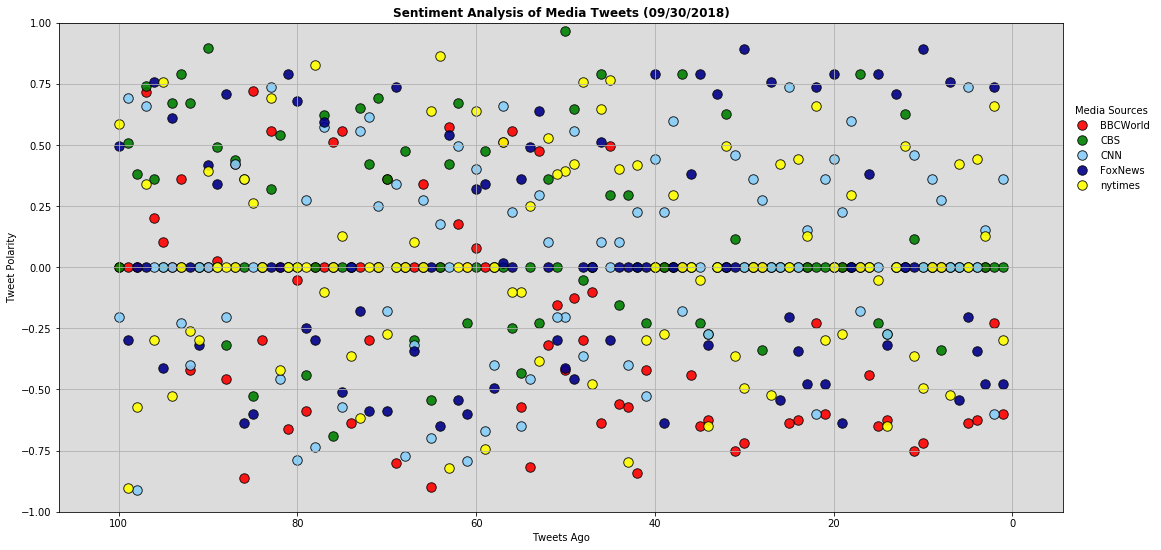

In [30]:
#Plotting the Data (SCATTER PLOT)

users = sentiment_df['User'].unique()      #deriving unique values to plot only 
colors = ['red', 'green', 'lightskyblue', 'darkblue', 'yellow']

for i in range(len(users)):
    plt.scatter(x=sentiment_df[sentiment_df['User']==users[i]]['Tweets_Ago'].values,
                y=sentiment_df[sentiment_df['User']==users[i]]['Compound_Score'].values,
                s = 90,
                c = colors[i], label = users[i],
                alpha = .9, edgecolor = 'black', linewidth = .9)

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.legend(title="Media Sources", loc= "upper right")
plt.legend(title = "Media Sources", frameon = False, edgecolor = 'black', bbox_to_anchor=(1, 0.85))
plt.grid()
plt.gcf().set_size_inches(18,9)
plt.rcParams['axes.facecolor'] = 'gainsboro'
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.ylim(-1, 1)
plt.savefig("Sentiment_Analysis_Tweets.png")

In [28]:
#dictionary and datatframe 
avg_sentiment = {'User': target_users, 'Avg_Compound_Score': all_sentiment_list}
avg_sentiment_df = pd.DataFrame(avg_sentiment)
avg_sentiment_df

,User,Avg_Compound_Score
0,@BBCWorld,-0.146055
1,@CBS,0.119640
2,@CNN,0.030792
3,@FoxNews,0.046963
4,@nytimes,0.032907


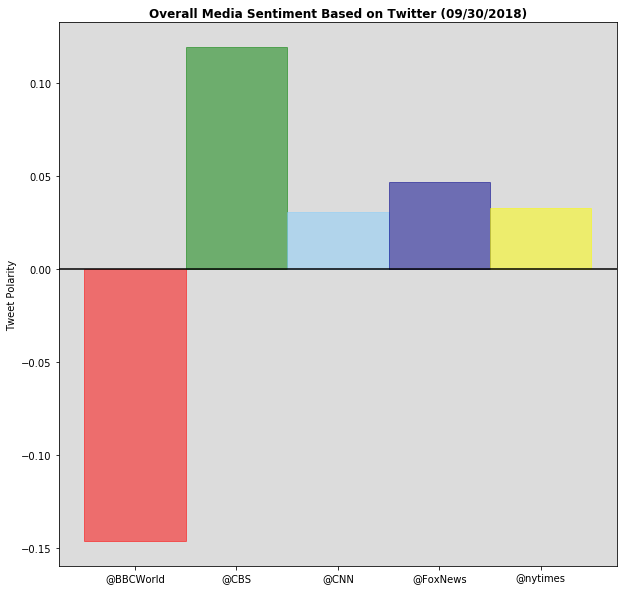

In [32]:
#Plotting the Data (BAR PLOT)

x_values = np.arange(len(avg_sentiment_df))
plt.figure(figsize=(10, 10))
barlist=plt.bar(x_values, avg_sentiment_df["Avg_Compound_Score"], alpha=0.5, align='center', width=1)
plt.xticks(x_values, avg_sentiment_df["User"], rotation="horizontal")
plt.axhline(y=0, color = 'black')                  #adds a horizontal line at zero
for i in range(len(barlist)):
    barlist[i].set_color(colors[i])
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.savefig("Overall_Media_Sentiment.png")